# 1. Load the Required Libraries and Dataset
# This section imports the necessary Python libraries and loads the dataset.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use("ggplot")

# Load the dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Explore the Dataset
## This section checks for missing values and examines data types.

In [3]:
# Display dataset info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3. Data Cleaning
## Fixing data type issues and handling missing values.

## Explanation:

## The TotalCharges column was incorrectly stored as a string (object type), so we convert it to numeric.
### Some missing values appeared due to conversion issues, and they are filled with 0.

In [4]:
# Convert 'TotalCharges' to numeric, handling errors by setting invalid values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' values with 0 (assuming they are from new customers)
df['TotalCharges'].fillna(0, inplace=True)

# Verify missing values are handled
df.isnull().sum()

C:\Users\rhyss\AppData\Local\Temp\ipykernel_22300\28094463.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 4. Churn Distribution Visualization
##### This section visualizes the overall distribution of churned vs. non-churned customers.

## Explanation:

### countplot() shows the proportion of churned vs. non-churned customers.
### The imbalance in the data suggests more customers do not churn than those who do.






C:\Users\rhyss\AppData\Local\Temp\ipykernel_22300\2537638858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette="pastel")


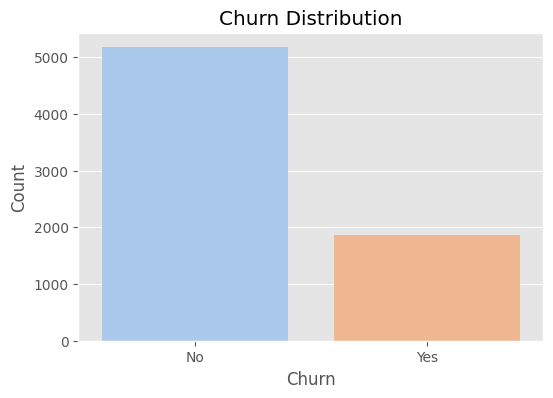

In [5]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Churn"], palette="pastel")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


## 5. Contract Type vs. Churn
#### Analyzing how contract length affects churn rate.
## Explanation:

## Customers with month-to-month contracts churn at a much higher rate than those with one-year or two-year contracts.
## Long-term contracts likely increase retention.

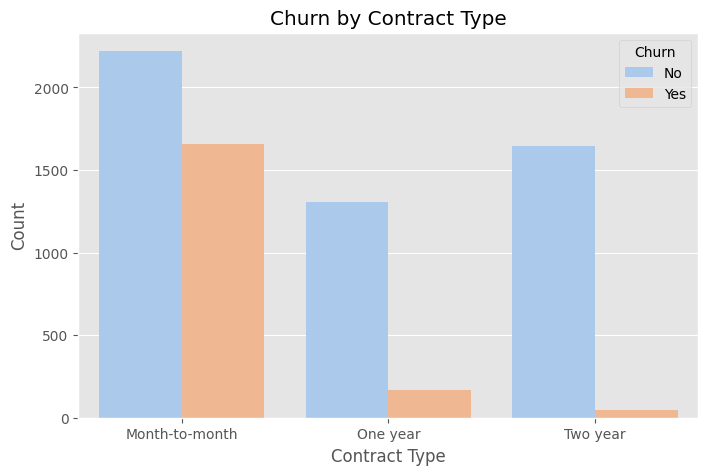

In [6]:
# Contract type vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="pastel")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


# 6. Monthly Charges and Churn Analysis
 #### Checking if higher charges contribute to churn.

# Explanation:

## The median monthly charge for churned customers is higher than for retained customers.
## Customers paying more may feel dissatisfied with the service or pricing.

C:\Users\rhyss\AppData\Local\Temp\ipykernel_22300\3251078355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="pastel")


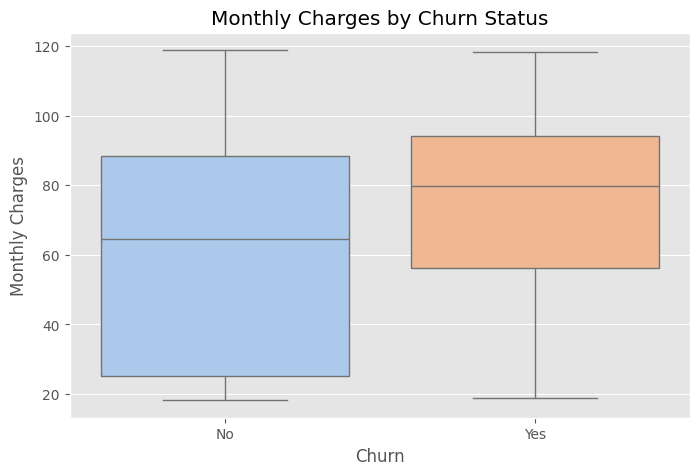

In [7]:
# Monthly Charges distribution by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="pastel")
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


## 7. Tenure and Churn Analysis
## Analyzing how long customers stay before they churn.

## Explanation:

## Customers who churn tend to have lower tenure, meaning they leave early.
## Long-tenured customers are much more likely to stay with the company.

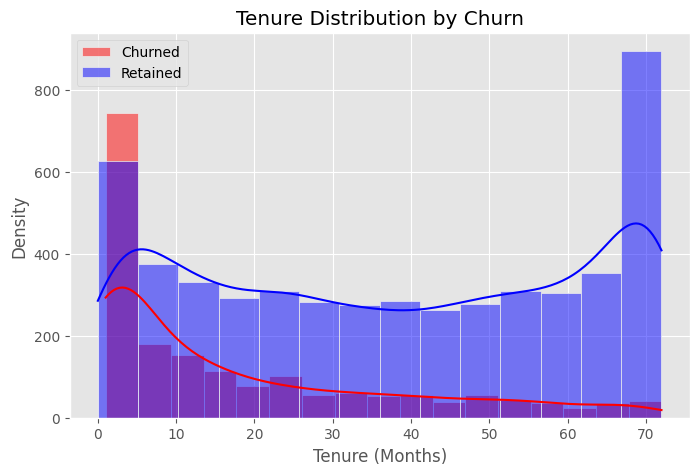

In [8]:
# Tenure distribution by Churn
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == "Yes"]["tenure"], kde=True, color="red", label="Churned")
sns.histplot(df[df["Churn"] == "No"]["tenure"], kde=True, color="blue", label="Retained")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Density")
plt.legend()
plt.show()
